<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy.stats import variation,zscore

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
df1=pd.read_csv('malaria.csv')
df1.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cases_Guinea         93 non-null     float64
 1   Cases_Liberia        83 non-null     float64
 2   Cases_SierraLeone    87 non-null     float64
 3   Cases_Nigeria        38 non-null     float64
 4   Cases_Senegal        25 non-null     float64
 5   Cases_UnitedStates   73 non-null     float64
 6   Cases_Spain          16 non-null     float64
 7   Cases_Mali           12 non-null     float64
 8   Deaths_Guinea        92 non-null     float64
 9   Deaths_Liberia       81 non-null     float64
 10  Deaths_SierraLeone   87 non-null     float64
 11  Deaths_Nigeria       38 non-null     float64
 12  Deaths_Senegal       22 non-null     float64
 13  Deaths_UnitedStates  57 non-null     float64
 14  Deaths_Spain         16 non-null     float64
 15  Deaths_Mali          12 non-null     flo

In [4]:
df1.describe()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
count,93.000000,83.000000,87.000000,38.000000,25.00,73.000000,16.0,12.000000,92.000000,81.000000,87.000000,38.000000,22.0,57.000000,16.000000,12.000000
mean,911.064516,2335.337349,2427.367816,16.736842,1.08,14.068493,1.0,3.500000,563.239130,1101.209877,693.701149,6.131579,0.0,8.789474,0.187500,3.166667
std,849.108801,2987.966721,3184.803996,5.998577,0.40,7.769829,0.0,2.746899,508.511345,1297.208568,869.947073,2.781901,0.0,6.651361,0.403113,2.405801
min,49.000000,3.000000,0.000000,0.000000,1.00,1.000000,1.0,1.000000,29.000000,2.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
25%,236.000000,25.500000,64.500000,15.000000,1.00,8.000000,1.0,1.000000,157.750000,12.000000,6.000000,4.000000,0.0,4.000000,0.000000,1.000000
50%,495.000000,516.000000,783.000000,20.000000,1.00,13.000000,1.0,2.500000,360.500000,294.000000,334.000000,8.000000,0.0,7.000000,0.000000,2.000000
75%,1519.000000,4162.500000,3801.000000,20.000000,1.00,20.000000,1.0,6.250000,847.750000,2413.000000,1176.000000,8.000000,0.0,12.000000,0.000000,6.000000
max,2776.000000,8166.000000,10030.000000,22.000000,3.00,34.000000,1.0,7.000000,1786.000000,3496.000000,2977.000000,8.000000,0.0,30.000000,1.000000,6.000000


### Let's begin with some hands-on practice exercises

In [5]:
df1.isnull().sum()

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df1.isnull().sum(axis=1)

0      12
1      12
2       8
3      12
4      16
       ..
122    10
123    14
124    14
125    14
126    14
Length: 127, dtype: int64

In [6]:
df=df1.isnull().sum(axis=1).to_frame()
df[df[0]==df1.shape[1]].join(df1)


,0,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
df=(df1.isnull().sum()/df1.shape[0]*100).sort_values(ascending=True)
for i in df:
    if i>60:
        print(i)
    else:
        print('less_than 60% data absence')

26.77165354330709 less_than 60% data absence
26.77165354330709 less_than 60% data absence
26.77165354330709 less_than 60% data absence
26.77165354330709 less_than 60% data absence
26.77165354330709 less_than 60% data absence
26.77165354330709 less_than 60% data absence
26.77165354330709 less_than 60% data absence
26.77165354330709 less_than 60% data absence
70.07874015748031
70.07874015748031
80.31496062992126
82.67716535433071
87.4015748031496
87.4015748031496
90.5511811023622
90.5511811023622


In [32]:
df=pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100).sort_values(by=0,ascending=True)
df

,0
Cases_Guinea,26.771654
Deaths_Guinea,27.559055
Cases_SierraLeone,31.496063
Deaths_SierraLeone,31.496063
Cases_Liberia,34.645669
Deaths_Liberia,36.220472
Cases_UnitedStates,42.519685
Deaths_UnitedStates,55.118110
Cases_Nigeria,70.078740
Deaths_Nigeria,70.078740


In [8]:
df=pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100)
df[df[0]>60]

,0
Cases_Nigeria,70.078740
Cases_Senegal,80.314961
Cases_Spain,87.401575
Cases_Mali,90.551181
Deaths_Nigeria,70.078740
Deaths_Senegal,82.677165
Deaths_Spain,87.401575
Deaths_Mali,90.551181


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df=pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100)
df

,0
Cases_Guinea,26.771654
Cases_Liberia,34.645669
Cases_SierraLeone,31.496063
Cases_Nigeria,70.078740
Cases_Senegal,80.314961
Cases_UnitedStates,42.519685
Cases_Spain,87.401575
Cases_Mali,90.551181
Deaths_Guinea,27.559055
Deaths_Liberia,36.220472


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

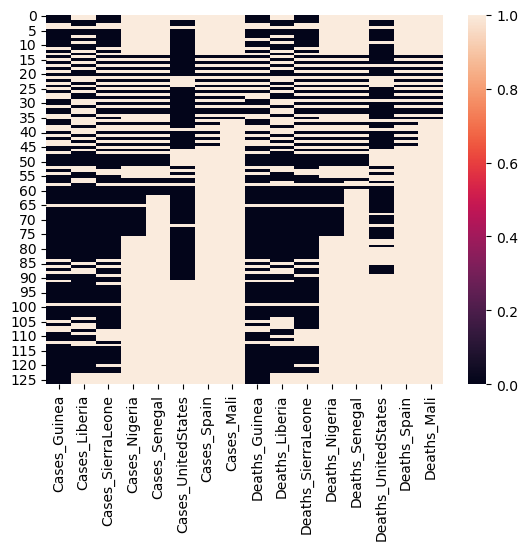

In [10]:
sns.heatmap(df1.isnull())

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
df1.dropna(axis=0,thresh=2,inplace=True)
df1

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1.drop(columns=['Cases_Mali','Deaths_Mali'],inplace=True)


In [34]:
df1

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1['Cases_Liberia'].fillna(df1['Cases_Liberia'].median(),inplace=True)
df1['Cases_Liberia'].isnull().sum()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1['Cases_UnitedStates'].fillna(df1['Cases_UnitedStates'].median(),inplace=True)
df1['Cases_UnitedStates'].isnull().sum()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1['Cases_Guinea'].fillna(df1['Cases_Guinea'].median(),inplace=True)
df1['Cases_Guinea'].isnull().sum()
df1['Deaths_Guinea'].fillna(df1['Deaths_Guinea'].median(),inplace=True)
df1['Deaths_Guinea'].isnull().sum()

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
house=pd.read_csv('house.csv')
house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<AxesSubplot:>

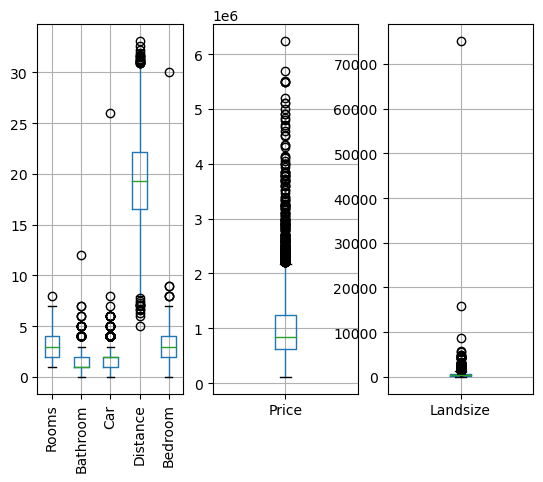

In [3]:
plt.subplot(1,3,1)
house.drop(columns=['Price','Landsize']).boxplot()
plt.xticks(rotation=90)
plt.subplot(1,3,2)
house[['Price']].boxplot()
plt.subplot(1,3,3)
house[['Landsize']].boxplot()


In [4]:
# so room has less outliers and price has most outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
from scipy.stats import zscore
house['Car_Zscore']=zscore(house['Car'])
house[(house['Car_Zscore']>3)| (house['Car_Zscore']<-3)]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Car_Zscore
56,3,h,1470000,S,Northern Metropolitan,2,5,612,17.0,2,3.511417
144,2,u,860000,S,Western Metropolitan,3,6,1057,13.5,3,4.540782
180,3,h,536000,S,Western Metropolitan,3,6,592,16.9,2,4.540782
189,2,u,620000,PI,Southern Metropolitan,2,5,537,21.2,2,3.511417
322,3,h,700000,S,Eastern Metropolitan,2,5,559,20.4,2,3.511417
511,3,h,630000,SP,Northern Metropolitan,4,7,2051,23.2,3,5.570147
569,3,h,650000,SP,South-Eastern Metropolitan,3,5,655,18.9,4,3.511417
589,3,h,800000,SP,Northern Metropolitan,7,6,0,16.4,3,4.540782
679,2,h,355000,S,Western Metropolitan,1,6,691,13.4,2,4.540782
702,3,h,770000,S,South-Eastern Metropolitan,2,5,754,11.8,5,3.511417


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Price', ylabel='Type'>

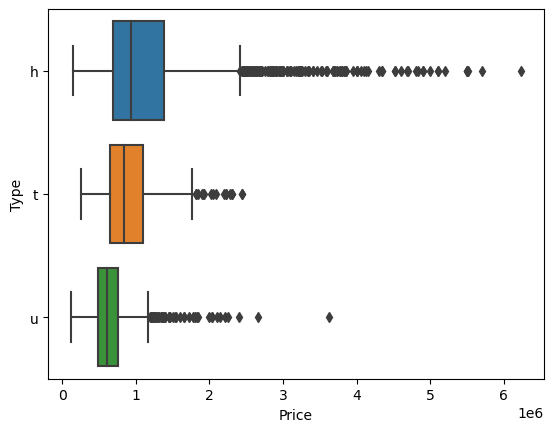

In [8]:
sns.boxplot(house['Price'],house['Type'])

In [ ]:
# h has extreme outliers and range of outliers is large
# u has outliers in comparatively smaller range
# t has very compressed outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
q1= house['Bedroom'].quantile(0.25)
q3= house['Bedroom'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print(ll)
print(ul)
house[(house['Bedroom']<ll)| (house['Bedroom']>ul)].shape[0]

-1.0
7.0


6

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
q1= house['Bathroom'].quantile(0.25)
q3= house['Bathroom'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print(ll)
print(ul)
house[(house['Bathroom']<ll)| (house['Bathroom']>ul)].shape[0]

-0.5
3.5


71

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
q1= house['Bedroom'].quantile(0.25)
q3= house['Bedroom'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print(ll)
print(ul)
house[(house['Bedroom']<ll)| (house['Bedroom']>ul)]

-1.0
7.0


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Car_Zscore
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8,-0.606042
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9,0.423323
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9,0.423323
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30,-0.606042
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8,0.423323
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8,-1.635407


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
house['Distance'].mean() 

19.32834662190515

In [37]:
q1= house['Distance'].quantile(0.25)
q3= house['Distance'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
house['Dist_otm']=house['Distance'].apply(lambda x: ul if(x>ul) else ll if(x<ll) else x )

In [38]:
house['Dist_otm'].mean()

19.32842005874946

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Price'>

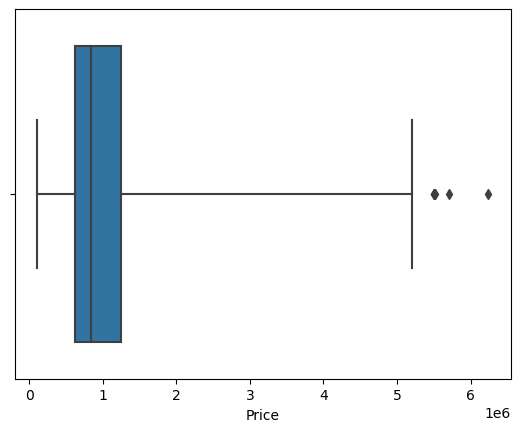

In [25]:
sns.boxplot(house['Price'],whis=6.5)

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
q1 = house['Distance'].quantile(0.25)
q3 = house['Distance'].quantile(0.75)

house['Distance_category']=house['Distance'].apply(lambda x :'short' if (x <= q1) else 'moderate' if (x > q1) and (x <= q3) else 'long')
house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Car_Zscore,Dist_otm,Distance_category
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,-0.606042,25.2,long
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,-0.606042,21.8,moderate
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,-1.635407,21.7,moderate
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,-0.606042,18.8,moderate
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,-1.635407,20.6,moderate


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

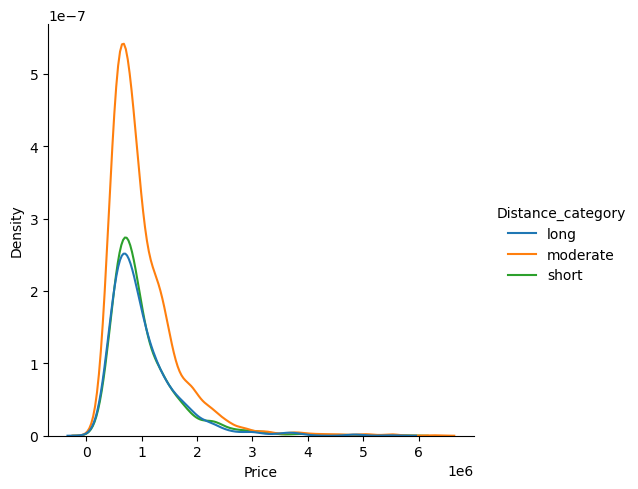

In [45]:
sns.displot(hue=house['Distance_category'], x=house['Price'],kind='kde')

<AxesSubplot:xlabel='Distance_category', ylabel='Price'>

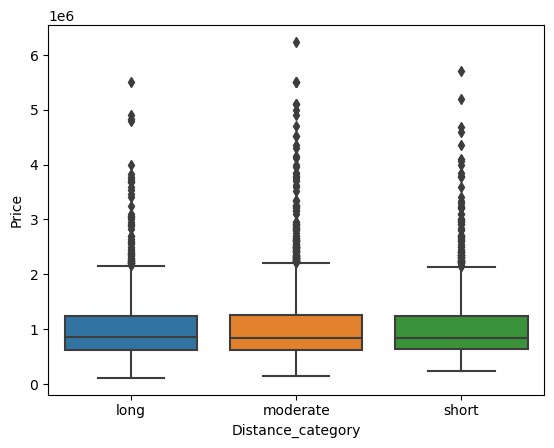

In [41]:
sns.boxplot(x=house['Distance_category'],y=house['Price'])

<a id="split"> </a>
## 6. Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [ ]:
x=house.drop(columns=['Price'])
y=house['price']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
from sklearn.model_selection import train_test_split
y=house['Price']
x=house.drop(columns=['Price'])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [35]:
xtrain

,Rooms,Type,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Car_Zscore,Dist_otm,Distance_category
463,2,u,S,South-Eastern Metropolitan,1,2,649,22.0,2,0.423323,22.0,moderate
558,3,h,PI,Eastern Metropolitan,2,2,752,22.4,3,0.423323,22.4,long
2213,4,h,S,Northern Metropolitan,1,2,811,24.7,2,0.423323,24.7,long
4058,5,h,S,South-Eastern Metropolitan,1,2,0,17.2,1,0.423323,17.2,moderate
1288,4,h,PI,Southern Metropolitan,2,2,323,23.4,2,0.423323,23.4,long
...,...,...,...,...,...,...,...,...,...,...,...,...
424,3,h,S,Eastern Metropolitan,1,1,72,17.4,2,-0.606042,17.4,moderate
4660,3,u,VB,Southern Metropolitan,1,1,0,19.6,5,-0.606042,19.6,moderate
3443,4,h,S,Western Metropolitan,2,2,684,9.5,1,0.423323,9.5,short
3732,3,h,PI,Southern Metropolitan,5,4,696,21.6,4,2.482052,21.6,moderate


In [36]:
xtest

,Rooms,Type,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Car_Zscore,Dist_otm,Distance_category
983,3,h,VB,South-Eastern Metropolitan,2,0,585,22.4,3,-1.635407,22.4,long
1806,2,h,S,Southern Metropolitan,1,1,0,17.2,3,-0.606042,17.2,moderate
536,3,h,PI,Southern Metropolitan,3,2,241,12.1,3,0.423323,12.1,short
1997,3,t,S,Southern Metropolitan,1,1,452,23.8,4,-0.606042,23.8,long
1299,4,h,S,Eastern Metropolitan,1,1,147,15.4,4,-0.606042,15.4,short
...,...,...,...,...,...,...,...,...,...,...,...,...
404,2,t,SP,Western Metropolitan,1,1,842,19.7,4,-0.606042,19.7,moderate
1113,1,u,PI,Southern Metropolitan,2,2,0,19.0,3,0.423323,19.0,moderate
1350,3,h,S,Southern Metropolitan,1,1,0,19.1,3,-0.606042,19.1,moderate
2000,5,h,S,Southern Metropolitan,1,1,622,22.5,5,-0.606042,22.5,long
